## ライブラリのインポート

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
from scipy.stats import gamma
import os

## ファイルの読み込み

In [44]:
# data/ の中にある csvファイルをリスト化
csv_files = [filename for filename in os.listdir('data') if filename.endswith('.csv')]
csv_files = sorted(csv_files)

# csvファイルの読み込み
raido_df = pd.read_csv(f'data/{csv_files[0]}', index_col=0)

# csv として書き出し
raido_df.to_csv('out/raido_init.csv')

In [45]:
# raido_df についてそれぞれの address の出現回数をカウント
addresss = raido_df['address'].value_counts()
print(addresss)
addresss.to_csv('out/address_count.csv')
# df に変換
address_df = pd.DataFrame(addresss)
print(address_df)

# 2つ以下の出現回数の address を削除
raido_df = raido_df[raido_df['address'].isin(address_df[address_df['count'] > 2].index)]

# 平均を取得
mean_df = raido_df.groupby('address').mean()

address
b0:26:80:d1:cf:0f                       30
80:ea:96:f2:cc:76                       30
b0:26:80:d1:d8:af                       30
b0:26:80:d1:cf:0e                       30
ac:44:f2:8c:e8:a8                       30
                                        ..
8F5A1854-105C-1C14-654A-C41A11D30A12     1
FECC9580-0160-68F0-903C-B4B165AAB9CC     1
81B676A5-3FC1-6849-5959-416BD24DC854     1
88FB6197-8818-1B42-7D06-78F5B783097B     1
F21D8594-4FF2-A6F4-A7CA-32C757E60BB2     1
Name: count, Length: 171, dtype: int64
                                      count
address                                    
b0:26:80:d1:cf:0f                        30
80:ea:96:f2:cc:76                        30
b0:26:80:d1:d8:af                        30
b0:26:80:d1:cf:0e                        30
ac:44:f2:8c:e8:a8                        30
...                                     ...
8F5A1854-105C-1C14-654A-C41A11D30A12      1
FECC9580-0160-68F0-903C-B4B165AAB9CC      1
81B676A5-3FC1-6849-5959-416BD24DC854    

In [46]:
# それぞれの address について rssi の分散を取得
vars_df = raido_df.groupby('address')['rssi'].var().reset_index().sort_values('rssi', ascending=False)

# 分散を df に変換し、列名を変更
vars_df.columns = ['address', 'var']
print(vars_df)
vars_df.to_csv('out/vars.csv')

# 標準偏差を取得
std_df = raido_df.groupby('address')['rssi'].std().reset_index().sort_values('rssi', ascending=False)
std_df.columns = ['address', 'std']
print(std_df)
std_df.to_csv('out/std.csv')

                                  address         var
74   9DC43723-8F13-4ABC-C756-AFD6762A9883  124.000000
36   402B799D-D0B5-1828-8A38-5A7872AC004C   93.344444
89   BB056977-A587-1AFB-A755-C463C98593B4   92.333333
99   D5AA8D74-3DBE-82D4-19CE-34AA4530CF30   87.333333
107  EC8DCE43-DC6A-E4ED-F9BC-72AFA2076DEE   86.333333
..                                    ...         ...
34                      3c:7c:3f:3e:71:44    0.000000
19                      28:ac:9e:3e:b1:80    0.000000
9                       10:27:f5:e3:50:96    0.000000
2                       00:24:a5:7b:b2:80    0.000000
146                     e8:4f:25:d6:2e:b9    0.000000

[147 rows x 2 columns]
                                  address        std
74   9DC43723-8F13-4ABC-C756-AFD6762A9883  11.135529
36   402B799D-D0B5-1828-8A38-5A7872AC004C   9.661493
89   BB056977-A587-1AFB-A755-C463C98593B4   9.609024
99   D5AA8D74-3DBE-82D4-19CE-34AA4530CF30   9.345231
107  EC8DCE43-DC6A-E4ED-F9BC-72AFA2076DEE   9.291573
..        

In [47]:
# # 正規分布を取得
# norm_df = raido_df.groupby('address')['rssi'].apply(lambda x: np.random.normal(x.mean(), x.std(), 1000))
# norm_df = pd.DataFrame(norm_df)
# print(norm_df)
# # rssi の numpy_array が全て同じ値の場合は0になるので、それを削除
# norm_df = norm_df[norm_df['rssi'].apply(lambda x: len(np.unique(x)) > 1)]
# norm_df.to_csv('out/norm.csv')

In [48]:
# # 1つずつプロット
# fig, axs = plt.subplots(len(norm_df.index), figsize=(8, 4*len(norm_df.index)))
# for i, address in enumerate(norm_df.index):
#     axs[i].hist(norm_df.loc[address], bins=50, alpha=0.5, label=address)
#     axs[i].legend()
# plt.tight_layout()
# plt.show()

In [49]:
# ガウス分布を取得
gauss_df = raido_df.groupby('address')['rssi'].apply(lambda x: np.random.normal(x.mean(), x.std(), 1000))
gauss_df = pd.DataFrame(gauss_df)
print(gauss_df)
# rssi の numpy_array が全て同じ値の場合は0になるので、それを削除
gauss_df = gauss_df[gauss_df['rssi'].apply(lambda x: len(np.unique(x)) > 1)]
gauss_df.to_csv('out/gauss.csv')

                                                                rssi
address                                                             
00:1d:73:f8:87:60  [-92.0, -92.0, -92.0, -92.0, -92.0, -92.0, -92...
00:24:a5:7b:aa:30  [-91.66800427935932, -92.76882230253122, -91.8...
00:24:a5:7b:b2:80  [-88.0, -88.0, -88.0, -88.0, -88.0, -88.0, -88...
00:90:fe:f7:da:b4  [-76.28947177472834, -77.57866855025856, -77.1...
00:90:fe:f7:da:b6  [-79.12441721715999, -76.1708391325736, -79.97...
...                                                              ...
d0:4f:58:52:f8:70  [-89.0, -89.0, -89.0, -89.0, -89.0, -89.0, -89...
d0:4f:58:52:f8:71  [-103.0, -103.0, -103.0, -103.0, -103.0, -103....
e8:4f:25:d3:9b:75  [-39.36673431836083, -39.65396912179322, -42.2...
e8:4f:25:d6:0e:45  [-57.6614037842521, -59.51786599969199, -58.26...
e8:4f:25:d6:2e:b9  [-75.0, -75.0, -75.0, -75.0, -75.0, -75.0, -75...

[147 rows x 1 columns]


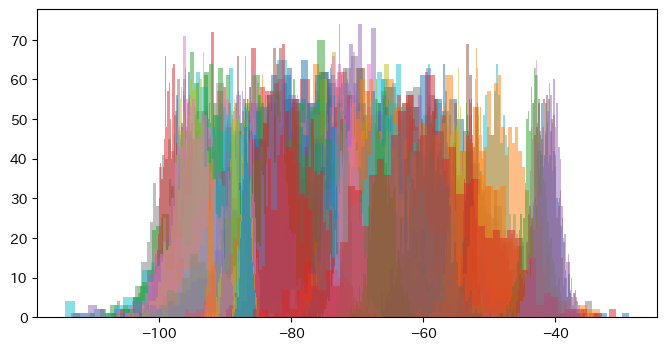

In [50]:
# 1つずつプロット
fig = plt.figure(figsize=(8, 4))
for address in gauss_df.index:
    plt.hist(gauss_df.loc[address], bins=50, alpha=0.5, label=address)
plt.show()


In [55]:
gauss_df_2 = gauss_df

In [57]:
# gauss_df と gauss_df_2 の 同様の address についてそれぞれの rssi の近さを計算
for address in gauss_df.index:
    print(address)
    for address_2 in gauss_df_2.index:
        if address == address_2:
            continue
        print(address_2)
        print(np.corrcoef(gauss_df.loc[address], gauss_df_2.loc[address_2])[0, 1])

rssi
